In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [3]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [4]:
data.tail(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5656448,Zimbabwe,ZWE,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,2015,5.0
5656449,Zimbabwe,ZWE,Tax payments (number),IC.TAX.PAYM,2015,49.0
5656450,Zimbabwe,ZWE,Time required to build a warehouse (days),IC.WRH.DURS,2015,448.0
5656451,Zimbabwe,ZWE,Time required to enforce a contract (days),IC.LGL.DURS,2015,410.0
5656452,Zimbabwe,ZWE,Time required to get electricity (days),IC.ELC.TIME,2015,106.0
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,36.0
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,90.0
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,242.0
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.3
5656457,Zimbabwe,ZWE,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,32.8


In [5]:
countries = data['CountryName'].unique().tolist()

In [6]:
len(countries)

247

In [7]:
country_code = data['CountryCode'].unique().tolist()
len(country_code)

247

In [8]:
indicators = data['IndicatorCode'].unique().tolist()
len(indicators)

1344

In [9]:
years = data['Year'].unique().tolist()
len(years)

56

# Basic plotting

In [10]:
co2_text = 'CO2 emissions \(metric'
country_text = 'USA'

In [11]:
mask1 = data['IndicatorName'].str.contains(co2_text)
mask2 = data['CountryCode'].str.contains(country_text)

stage = data[mask1 & mask2]

In [12]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


In [13]:
year = stage['Year'].values
co2_lvl = stage['Value'].values
len(year), len(co2_lvl)

(52, 52)

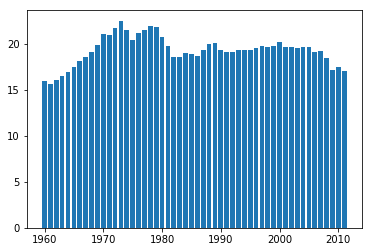

In [14]:
plt.bar(year, co2_lvl)
plt.show()

### Line plot

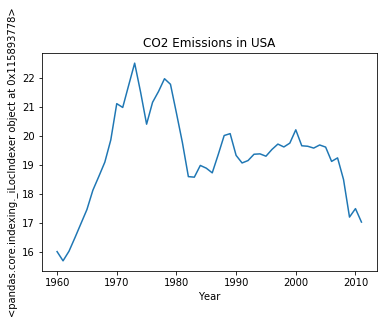

In [15]:
plt.plot(year, co2_lvl)

# labels
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc(0))

plt.title('CO2 Emissions in USA')

plt.show()

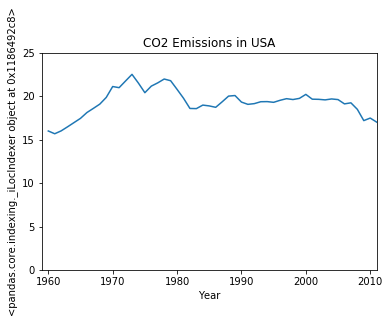

In [16]:
plt.plot(year, co2_lvl)

# labels
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc(0))

plt.title('CO2 Emissions in USA')

# As y axisis not starting from 0 (starting at 15), specify it explicitly
plt.axis([1959, 2011, 0, 25])

plt.show()

## Histograms

In [17]:
hist_data = stage['Value'].values
len(hist_data)

52

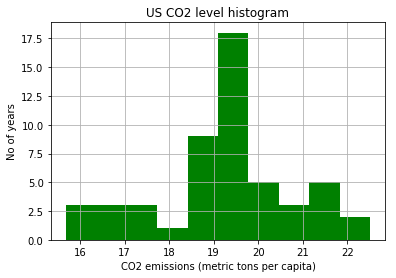

In [18]:
plt.hist(hist_data, bins=10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('No of years')
plt.title('US CO2 level histogram')

plt.grid(True)
plt.show()

## US vs other countries

In [19]:
co2_year = 2011

In [20]:
mask1 = data['IndicatorName'].str.contains(co2_text)
mask2 = data['Year'].isin([co2_year])

In [21]:
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [22]:
len(co2_2011)

232

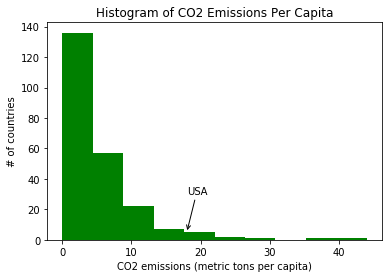

In [23]:
fig, ax = plt.subplots() # subplots returns a touple with the figure, axis attributes.

ax.annotate("USA", 
            xy=(18, 5), xycoords='data', 
            xytext=(18, 30), textcoords='data', 
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))

plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of countries')

plt.title('Histogram of CO2 Emissions Per Capita')

plt.show()


## GDP vs CO2 emission

In [24]:
gdp_text = 'GDP per capita \(constant 2005'
mask1 = data['IndicatorName'].str.contains(gdp_text)
mask2 = data['CountryCode'].str.contains(country_text)

gdp_stage = data[mask1 & mask2]

In [25]:
gdp_stage.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685
105760,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,16749.789436
134798,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,17476.822248


In [26]:
stage.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


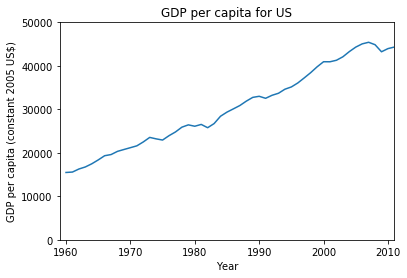

In [27]:
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

plt.axis([1959, 2011, 0, 50000])
plt.title("GDP per capita for US")

plt.show()

### Scatter plot to compare GDP against CO2 emission

Ensure same time frames

In [28]:
print("GDP min year : ", gdp_stage['Year'].min(), " max : ", gdp_stage['Year'].max())
print("CO2 emission min year : ", stage['Year'].min(), " max : ", stage['Year'].max())

GDP min year :  1960  max :  2014
CO2 emission min year :  1960  max :  2011


We need to truncate 3 years off GDP as scatterplot requires equal length arrarys

In [29]:
gdp_trunc = gdp_stage[gdp_stage['Year'] <= 2011]

In [30]:
gdp_trunc.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4472959,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2007,45420.187361
4652803,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2008,44861.390895
4831465,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2009,43235.558409
5018182,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2010,43961.168477
5194861,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2011,44324.944522


In [31]:
print(len(stage))
len(gdp_trunc)

52


52

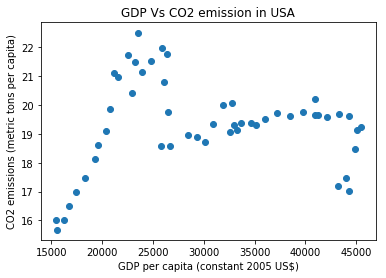

In [32]:
plt.scatter(gdp_trunc['Value'].values, stage['Value'].values)

plt.xlabel(gdp_trunc['IndicatorName'].iloc[0])
plt.ylabel(stage['IndicatorName'].iloc[0])

plt.title('GDP Vs CO2 emission in USA')

plt.show()

Looks like a weak relationship. We can also test this using correlation

In [33]:
np.corrcoef(gdp_trunc['Value'], stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

*0.07 correlation coff. is quite weak*

# Using Folium

In [34]:
import folium

In [35]:
country_geo = './world-development-indicators/world-countries.json'

In [36]:
mask1 = data['IndicatorName'].str.contains(co2_text) 
mask2 = data['Year'].isin([co2_year])

# apply our mask
stage = data[mask1 & mask2]
stage.head()

stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [37]:
plot_data = stage[['CountryCode', 'Value']]
plot_data.head()

,CountryCode,Value
5026275,ARB,4.724500
5026788,CSS,9.692960
5027295,CEB,6.911131
5027870,EAS,5.859548
5028456,EAP,5.302499


In [38]:
ind_label_text = stage['IndicatorName'].iloc[0]
ind_label_text

'CO2 emissions (metric tons per capita)'

## Folium stuff

In [39]:
map = folium.Map(location=[100, 0], zoom_start=1.5)

#### The country code in plot_data maps to the country code in the JSON file which is feature.id

In [40]:
map.choropleth(geo_data=country_geo, data=plot_data,
               columns=['CountryCode', 'Value'],
               key_on='feature.id',
               fill_color='YlGnBu', 
               fill_opacity=0.7, 
               line_opacity=0.2,
               legend_name=ind_label_text)

/anaconda3/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [41]:
map.save('plot_data.html') # Create folium map

In [42]:
#Import interactive folium map
from IPython.display import HTML
HTML('<iframe src=plot_data.html width=700 height=450></iframe>')